In [ ]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import numpy as np
import pandas as pd
from pathlib import Path
from nltk.tokenize import word_tokenize, sent_tokenize
import plotly.express as px
from plotly.offline import iplot

import os
import cv2
import argparse
import numpy as np
import pandas as pd
import glob
from PIL import Image
import datetime
import matplotlib.pyplot as plt

from collections import Counter
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from keras.callbacks import Callback
from keras.backend import clear_session
from keras.models import Model, load_model, Sequential
from keras.layers import Dense, Input, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.applications import resnet50, mobilenet, xception
from tensorflow.keras.optimizers import SGD

from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_ing = ["acidulated water,ackee,acorn squash,aduki beans,advocaat,agar-agar,ale,alfalfa sprouts,allspice,almond,almond essence,almond extract,amaranth,amaretti,anchovies,anchovy essence,angelica,angostura bitters,anise,apple,apple chutney,apple juice,apple sauce,apricot,apricot jam,arborio rice,arbroath smokie,argan oil,arrowroot,artichoke,asafoetida,asparagus,aubergine,avocado,bacon,bagel,baguette,baked beans,baking,baking powder,balsamic vinegar,bamboo shoots,banana,banana bread,barbary duck,barbecue sauce,barley,basil,basmati rice,bay boletes,bay leaf,beans,beansprouts,bechamel sauce,beef,beef consomme,beef dripping,beef mince,beef ribs,beef rump,beef sausage,beef stock,beef tomato,beer,beetroot,berry,betel leaves,beurre manie,bicarbonate of soda,bilberries,bird's-eye chillies,biscotti,biscuits,blachan,black beans,black bream,black eyed beans,black pepper,black pudding,black sesame seeds,black treacle,blackbean sauce,blackberry,blackcurrant,blackcurrant juice drink,blini,blood orange,blueberry,boar,bok choi,bonito,borage,borlotti beans,bouquet garni,braising steak,bramley apple,bran,brandy,brandy butter,brandy snaps,bratwurst,brazil nut,bread,bread roll,bread sauce,breadcrumbs,breadfruit,breadsticks,bresaola,brie,brill,brioche,brisket,broad beans,broccoli,broth,brown bread,brown lentil,brown rice,brown sauce,brown shrimp,brown sugar,brussels sprouts,buckwheat,buckwheat flour,bulgur wheat,buns,burger,butter,butter beans,buttercream icing,butterhead lettuce,buttermilk,butternut squash,cabbage,caerphilly,cake,calasparra rice,calvados,camembert,campagne loaf,candied peel,cannellini beans,cape gooseberries,capers,capsicum,caramel,caraway seeds,cardamom,carob,carrageen moss,carrageen_moss,carrot,cashew,cassava,caster sugar,catfish,caul fat,cauliflower,cava,caviar,cavolo nero,cayenne pepper,celeriac,celery,celery seeds,champ,champagne,chanterelle mushrooms,chantilly cream,chapati flour,chapatis,charcuterie,chard,charlotte potato,chayote,cheddar,cheese,cheese sauce,cherry,cherry brandy,cherry tomatoes,chervil,cheshire,chestnut,chestnut mushrooms,chicken,chicken breast,chicken casserole,chicken leg,chicken liver,chicken soup,chicken stock,chicken thigh,chicken wing,chickpea,chickpea flour,chicory,chilli,chilli con carne,chilli oil,chilli paste,chilli powder,chilli sauce,chinese cabbage,chinese mushrooms,chinese pancake,chipotle,chips,chives,chocolate,chocolate biscuit,chocolate brownies,chocolate cake,chocolate mousse,chocolate truffle,chopped tomatoes,chorizo,choux pastry,christmas cake,christmas pudding,chuck and blade,chump,chutney,ciabatta,cider,cinnamon,citrus fruit,clams,clarified butter,clementine,clotted cream,cloves,cobnut,cockles,cocktail,cocoa butter,cocoa powder,coconut,coconut cream,coconut milk,coconut oil,cod,cod roe,coffee,coffee beans,coffee essence,coffee granules,coffee liqueur,cognac,cola,coleslaw,coley,collar,compote,comte,condensed milk,confectionery,coriander,coriander cress,coriander seeds,corn oil,corn syrup,corned beef,cornflour,cos lettuce,cottage cheese,coulis,courgette,court bouillon,couscous,crab,crab apple,crackers,cranberry,cranberry juice,cranberry sauce,crayfish,cream,cream cheese,cream liqueur,cream of tartar,cream soda,creamed coconut,creme fraiche,crepe,cress,crispbread,crisps,croissant,crostini,croutons,crudites,crumble,crystallised ginger,cucumber,cumberland sauce,cumin,curacao,curd,curd cheese,curly kale,currant bread,currants,curry,curry leaves,curry paste,curry powder,custard,custard powder,cuttlefish,dab,daikon,damsons,dandelion,danish blue,dark chocolate,date,demerara sugar,demi-glace sauce,desiccated coconut,desiree,digestive biscuit,dijon mustard,dill,dim sum wrappers,dolcelatte,double cream,double gloucester,dover sole,dragon fruit,dried apricots,dried cherries,dried chilli,dried fruit,dried mixed fruit,dry sherry,duck,duck confit,duck fat,dulce de leche,dumplings,duxelles,edam,eel,egg,egg wash,egg white,egg yolk,elderberries,elderflower,emmental,english muffin,english mustard,escalope,evaporated milk,exotic fruit,farfalle,fat,fennel,fennel seeds,fenugreek,feta,fettuccine,field mushroom,fig,fillet of beef,filo pastry,fish,fish roe,fish sauce,fish soup,five-spice powder,flageolet beans,flaked almonds,flank,flapjacks,flatbread,flatfish,fleur de sel,flour,flour tortilla,floury potato,flying fish,focaccia,foie gras,fondant icing,fondant potatoes,fontina cheese,food colouring,forced rhubarb,fortified wine,fragrant rice,frangipane,frankfurter,freekeh,french beans,french bread,french dressing,fresh coriander,fresh tuna,fromage frais,fruit,fruit brandy,fruit cake,fruit juice,fruit salad,fudge,fusilli,galangal,game,gammon,garam masala,garlic,garlic and herb cream cheese,garlic bread,gelatine,ghee,gherkin,giblets,gin,ginger,ginger ale,ginger beer,ginger biscuit,gingerbread,glace cherries,globe artichoke,glucose,gnocchi,goats' cheese,goats' milk,golden syrup,goose,goose fat,gooseberry,gorgonzola,gouda,grain,grape juice,grapefruit,grapefruit juice,grapes,grapeseed oil,gratin,gravy,gravy browning,green banana,green beans,green cabbage,green lentil,green tea,greengages,grey mullet,ground almonds,ground ginger,grouse,gruyere,guacamole,guava,guinea fowl,gurnard,habanero chillies,haddock,haggis,hake,halibut,halloumi,ham,hare,haricot beans,harissa,hazelnut,hazelnut oil,heart,herbal liqueur,herbal tea,herbes de provence,herbs,herring,hogget,hoisin sauce,hoki,hollandaise sauce,hominy,honey,honeycomb,horseradish,horseradish sauce,hot cross buns,hummus,hunza apricots,ice cream,iceberg lettuce,icing,icing sugar,irish stout,jaggery,jam,january king cabbage,japanese pumpkin,jelly,jerk seasoning,jersey royal potatoes,jerusalem artichoke,john dory,jujube,juniper berries,jus,kabana,kale,ketchup,ketjap manis,kidney,kidney beans,king edward,kipper,kirsch,kiwi fruit,kohlrabi,kumquat,lager,lamb,lamb breast,lamb chop,lamb fillet,lamb kidney,lamb loin,lamb mince,lamb neck,lamb rump,lamb shank,lamb shoulder,lamb stock,lancashire,langoustine,lard,lardons,lasagne,lasagne sheets,laverbread,leek,leftover turkey,leg of lamb,lemon,lemon balm,lemon curd,lemon juice,lemon sole,lemonade,lemongrass,lentils,lettuce,lime,lime cordial,lime juice,lime leaves,lime pickle,ling,lingonberry,linguine,liqueur,liquorice,little gem lettuce,liver,loaf cake,lobster,loganberry,long-grain rice,lovage,lychee,macadamia,macaroni,macaroon,mace,mackerel,madeira,madeira cake,madeleines,maize,malted grain bread,manchego,mandarin,mangetout,mango,mango chutney,mango juice,mango pickle,mangosteen,maple syrup,margarine,marjoram,marmalade,marrow,marrowfat peas,marsala wine,marshmallow,marzipan,mascarpone,mashed potato,matzo,mayonnaise,meat,medlars,megrim,melon,melon seeds,meringue,mesclun,milk,milk chocolate,milkshake,millet,millet flour,mince,mince pies,mincemeat,mint,mint sauce,mirepoix,mirin,miso,mixed berries,mixed dried beans,mixed fish,mixed nuts,mixed spice,mixed spices,molasses,monk's beard,monkfish,morel,mortadella,mozzarella,muesli,muffins,mulberries,mulled wine,mung beans,mushroom,mussels,mustard,mustard cress,mustard leaves,mustard oil,mustard powder,mustard seeds,mutton,naan bread,nachos,nashi,nasturtium,nectarine,nettle,new potatoes,nibbed almonds,noodle soup,noodles,nori,nougat,nut,nutmeg,oatcakes,oatmeal,oats,octopus,offal,oil,oily fish,okra,olive,olive oil,onion,orange,orange juice,orange liqueur,oregano,ouzo,oxtail,oyster,oyster mushrooms,oyster sauce,paella,pak choi,palm sugar,pancakes,pancetta,pandan leaves,paneer,panettone,papaya,pappardelle,paprika,parfait,parmesan,parsley,parsnip,partridge,passata,passion fruit,passion fruit juice,pasta,pastrami,pastry,pasty,pate,paw-paw,pea shoots,peach,peanut butter,peanut oil,peanuts,pear,pearl barley,peas,pecan,pecorino,pectin,peel,penne,pepper,peppercorn,pepperoni,perch,perry,pesto,pheasant,piccalilli,pickle,pickled onion,pie,pig cheeks,pigeon,pigeon peas,pike,pine nut,pineapple,pineapple juice,pink fir apple,pink peppercorn,pinto beans,piri-piri,pistachio,pitta bread,pizza,plaice,plain flour,plantain,plum,polenta,pollack,pollock,pomegranate,pomegranate juice,pomelo,popcorn,poppy seeds,porcini,pork,pork belly,pork chop,pork fillet,pork leg,pork loin,pork mince,pork sausages,pork shoulder,pork spare rib,port,portobello mushrooms,potato,potato rosti,potato wedges,poultry,poussin,praline,prawn,prawn crackers,preserved lemons,preserves,prosciutto,prune,prune juice,pudding rice,puff pastry,pulled pork,pumpernickel bread,pumpkin,pumpkin seed,purple sprouting broccoli,puy lentils,quail,quail's egg,quatre-epices,quince,quinoa,rabbit,rack of lamb,radicchio,radish,rainbow chard,rainbow trout,raisins,raita,rapeseed oil,ras-el-hanout,raspberry,raspberry jam,ratafia biscuits,ratatouille,red cabbage,red leicester,red lentil,red mullet,red onion,red rice,red snapper,red wine,red wine vinegar,redcurrant,redcurrant jelly,rennet,rhubarb,rib of beef,rice,rice flour,rice noodles,rice pudding,rice vinegar,rice wine,ricotta,rigatoni,risotto,risotto rice,roast beef,roast chicken,roast lamb,roast pork,roast potatoes,roast turkey,roasted vegetables,rock salmon,rock salt,rocket,root beer,root vegetable,roquefort,rose wine,rosehip syrup,rosemary,rosewater,rouille,royal icing,rum,rump,runner beans,rye bread,rye flour,safflower oil,saffron,sage,salad,salad cream,salad leaves,salami,salmon,salsa,salsify,salt,salt beef,salt cod,sambuca,samphire,sardine,sashimi,satsuma,sauces,saucisson,sausage,savory,savoy cabbage,scallop,scotch bonnet chilli,scrag,sea bass,sea bream,sea salt,sea trout,seafood,seasoning,seaweed,seeds,self-raising flour,semolina,serrano ham,sesame oil,sesame seeds,seville orange,shallot,sharon fruit,shellfish,sherry,sherry vinegar,shiitake mushroom,shin,shortbread,shortcrust pastry,sichuan pepper,silverside,single cream,sirloin,skate,sloe,sloe gin,smoked cheese,smoked fish,smoked haddock,smoked mackerel,smoked salmon,smoked trout,snapper,soba noodles,soda,soda bread,sole,sorbet,sorrel,soup,sourdough bread,soured cream,soy sauce,soya beans,soya flour,soya milk,soya oil,spaghetti,spaghetti squash,sparkling wine,spelt,spelt flour,spices,spinach,split peas,sponge cake,spring greens,spring onion,spring roll wrappers,squash,squid,star anise,starfruit,steak,stem ginger,stew,stewing lamb,stilton,stock,straw mushroom,strawberry,strawberry jam,strega liqueur,strong white flour,stuffing,sucralose,suet,sugar,sugar-snap peas,sultanas,sumac,summer cabbage,summer fruit,sunflower oil,sunflower seed,sushi rice,swede,sweet potato,sweet sherry,sweetbread,sweetcorn,swiss chard,swiss rolls and roulades,swordfish,syrup,t-bone steak,tabasco,taco,tagliatelle,tahini,taleggio,tamari,tamarillo,tamarind,tangerine,tapenade,tapioca,taro,tarragon,tartare sauce,tayberry,tea,tempura,tequila,teriyaki,teriyaki sauce,terrine,thai basil,thyme,tilapia,tinned tuna,toffee,tofu,tomatillo,tomato,tomato chutney,tomato juice,tomato puree,tongue,tonic,topside,tortellini,tripe,trout,truffle,truffle oil,turbot,turkey,turkey breast,turkey mince,turkish delight,turmeric,turnip,unleavened bread,vacherin,vanilla essence,vanilla extract,vanilla pod,veal,vegetable oil,vegetable shortening,vegetable stock,vegetables,vegetarian sausage,venison,verjus,vermicelli,vermouth,vine leaves,vinegar,vodka,vodka cocktail,waffles,walnut,walnut oil,wasabi,water chestnut,watercress,watermelon,waxy potato,webbs lettuce,wensleydale,wheatgerm,whelk,whipping cream,whisky,whisky cocktail,whisky liqueur,white bread,white cabbage,white chocolate,white fish,white pepper,white wine,white wine vinegar,whitebait,whitecurrant,whiting,whole wheat pasta,wholegrain mustard,wholemeal bread,wholemeal flour,wild duck,wild garlic,wild mushrooms,wild rice,wine,winkles,wood pigeon,worcestershire sauce,wraps,yam,yeast,yellow lentil,yoghurt,zander,zest"]

In [ ]:
# BASE_DIR = '/content/drive/MyDrive/gproject/Food Images/'

In [ ]:
# data_path = "/content/drive/MyDrive/gproject/Food Images/Food Images"
images_fl = "/content/drive/MyDrive/DeepLearning/projectm/project/dataset/FoodImages/FoodImages"

IMAGE_DIR = "/content/drive/MyDrive/DeepLearning/projectm/project/dataset/FoodImages/FoodImages"


In [ ]:
image_files = os.listdir(images_fl)
image_file_set= set(image_files)

In [ ]:
print(image_files[:5])

['tiramisu-with-amaretti-cookies.jpg', 'tiramisu-yule-log-51142210.jpg', 'to-dye-easter-eggs-241824.jpg', 'to-form-water-caltrop-wontons-51147800.jpg', 'to-make-an-excellent-cherry-bounce-394679.jpg']


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DeepLearning/Project/data/Food Ingredients and Recipe Dataset with Image Name Mapping.csv')

In [ ]:
df

,Unnamed: 0,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients
0,0,Miso-Butter Roast Chicken With Acorn Squash Pa...,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...","Pat chicken dry with paper towels, season all ...",miso-butter-roast-chicken-acorn-squash-panzanella,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher..."
1,1,Crispy Salt and Pepper Potatoes,"['2 large egg whites', '1 pound new potatoes (...",Preheat oven to 400°F and line a rimmed baking...,crispy-salt-and-pepper-potatoes-dan-kluger,"['2 large egg whites', '1 pound new potatoes (..."
2,2,Thanksgiving Mac and Cheese,"['1 cup evaporated milk', '1 cup whole milk', ...",Place a rack in middle of oven; preheat to 400...,thanksgiving-mac-and-cheese-erick-williams,"['1 cup evaporated milk', '1 cup whole milk', ..."
3,3,Italian Sausage and Bread Stuffing,"['1 (¾- to 1-pound) round Italian loaf, cut in...",Preheat oven to 350°F with rack in middle. Gen...,italian-sausage-and-bread-stuffing-240559,"['1 (¾- to 1-pound) round Italian loaf, cut in..."
4,4,Newton's Law,"['1 teaspoon dark brown sugar', '1 teaspoon ho...",Stir together brown sugar and hot water in a c...,newtons-law-apple-bourbon-cocktail,"['1 teaspoon dark brown sugar', '1 teaspoon ho..."
...,...,...,...,...,...,...
13496,13496,Brownie Pudding Cake,"['1 cup all-purpose flour', '2/3 cup unsweeten...",Preheat the oven to 350°F. Into a bowl sift to...,brownie-pudding-cake-14408,"['1 cup all-purpose flour', '2/3 cup unsweeten..."
13497,13497,Israeli Couscous with Roasted Butternut Squash...,"['1 preserved lemon', '1 1/2 pound butternut s...",Preheat oven to 475°F.\nHalve lemons and scoop...,israeli-couscous-with-roasted-butternut-squash...,"['1 preserved lemon', '1 1/2 pound butternut s..."
13498,13498,Rice with Soy-Glazed Bonito Flakes and Sesame ...,['Leftover katsuo bushi (dried bonito flakes) ...,"If using katsuo bushi flakes from package, moi...",rice-with-soy-glazed-bonito-flakes-and-sesame-...,['Leftover katsuo bushi (dried bonito flakes) ...
13499,13499,Spanakopita,['1 stick (1/2 cup) plus 1 tablespoon unsalted...,Melt 1 tablespoon butter in a 12-inch heavy sk...,spanakopita-107344,['1 stick (1/2 cup) plus 1 tablespoon unsalted...


In [ ]:
df = df.dropna(subset=['Image_Name'])

In [ ]:
df

In [ ]:
df['Image_Name'] = df['Image_Name'].str.strip().str.lower()

In [ ]:
df['Image_Name'] = df['Image_Name'].apply(lambda x: x + '.jpg' if not x.endswith(('.jpg', '.png')) else x)

df['Image_Path'] = df['Image_Name'].apply(lambda x: os.path.join(images_fl, x))

image_file_set = {f for f in os.listdir(images_fl) if f.lower().endswith(('.jpg', '.png'))}

df['Valid_Image'] = df['Image_Name'].isin(image_file_set)
valid_df = df[df['Valid_Image']].copy()

print(f"Number of valid rows: {len(valid_df)}")

missing_images = df[~df['Valid_Image']]['Image_Name'].unique()
if len(missing_images) > 0:
    print(f"Missing images: {missing_images}")
else:
    print("No missing images.")

valid_df['Ingredients'] = valid_df['Ingredients'].apply(lambda x: [i.strip() for i in x.split(',')])

valid_ingredients_list = sorted(list({ingredient for row in valid_df['Ingredients'] for ingredient in row}))

NUM_INGREDIENTS = len(valid_ingredients_list)
print(f"Number of unique ingredients: {NUM_INGREDIENTS}")

ingredient_to_index = {ingredient: idx for idx, ingredient in enumerate(valid_ingredients_list)}

print(valid_df.head())

In [ ]:
valid_df = valid_df[valid_df['Image_Name'] != '#name?.jpg']

In [1]:
valid_df

NameError: name 'valid_df' is not defined

In [ ]:
df = df.drop(df.columns[0], axis=1)

In [ ]:
print(df['Image_Name'].dtype)
print(df['Image_Name'].isnull().sum())
missing_extensions = df[~df['Image_Name'].str.endswith(('.jpg'))]
df['Image_Name'] = df['Image_Name'].str.strip().str.lower()
df = df.drop(df.columns[0], axis=1)
df

In [ ]:
# fixing mising extensio
df['Image_Name'] = df['Image_Name'].apply(lambda x: x + '.jpg' if not x.endswith(('.jpg', '.png')) else x)

In [ ]:
dataset_images = set(df['Image_Name'])
missing_images = dataset_images - image_file_set
if missing_images:
    print(f"Missing images: {missing_images}")
else:
    print("No missing images.")
valid_df = df[df['Image_Name'].isin(image_file_set)]
print(f"Number of valid rows: {len(valid_df)}")



Missing images: {'#name?.jpg'}
Number of valid rows: 13471


In [ ]:
from PIL import UnidentifiedImageError
import tensorflow as tf

def data_generator(df):
    for _, row in df.iterrows():
        try:
            image = row['image']
            label = row['encoded_ingredients']
            yield image, label
        except (UnidentifiedImageError, Exception) as e:
            print(f"Skipping corrupted image: {e}")

In [ ]:
valid_df['Image_Name'][1]
valid_df.head()

,Ingredients,Instructions,Image_Name,Cleaned_Ingredients,Image_Path,Valid_Image
0,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...","Pat chicken dry with paper towels, season all ...",miso-butter-roast-chicken-acorn-squash-panzane...,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...",/content/drive/MyDrive/DeepLearning/projectm/p...,True
1,"['2 large egg whites', '1 pound new potatoes (...",Preheat oven to 400°F and line a rimmed baking...,crispy-salt-and-pepper-potatoes-dan-kluger.jpg,"['2 large egg whites', '1 pound new potatoes (...",/content/drive/MyDrive/DeepLearning/projectm/p...,True
2,"['1 cup evaporated milk', '1 cup whole milk', ...",Place a rack in middle of oven; preheat to 400...,thanksgiving-mac-and-cheese-erick-williams.jpg,"['1 cup evaporated milk', '1 cup whole milk', ...",/content/drive/MyDrive/DeepLearning/projectm/p...,True
3,"['1 (¾- to 1-pound) round Italian loaf, cut in...",Preheat oven to 350°F with rack in middle. Gen...,italian-sausage-and-bread-stuffing-240559.jpg,"['1 (¾- to 1-pound) round Italian loaf, cut in...",/content/drive/MyDrive/DeepLearning/projectm/p...,True
4,"['1 teaspoon dark brown sugar', '1 teaspoon ho...",Stir together brown sugar and hot water in a c...,newtons-law-apple-bourbon-cocktail.jpg,"['1 teaspoon dark brown sugar', '1 teaspoon ho...",/content/drive/MyDrive/DeepLearning/projectm/p...,True


In [ ]:
df['Ingredients'] = df['Ingredients'].apply(lambda x: x.split(','))
valid_ingredients_list = sorted(list({Ingredient.strip() for row in df['Ingredients'] for Ingredient in row}))
NUM_INGREDIENTS = len(valid_ingredients_list)

In [ ]:
df['Cleaned_Ingredients'] = df['Cleaned_Ingredients'].apply(lambda x: x.split(','))
valid_ingredients_list_cleaned = sorted(list({Ingredient.strip() for row in df['Cleaned_Ingredients'] for Ingredient in row}))
NUM_INGREDIENTS_C = len(valid_ingredients_list_cleaned)

In [ ]:
cleaned_ingredients=df['Cleaned_Ingredients'].tolist()
cleaned_ingredients

In [ ]:
base_ing = base_ing[0].split(",")

ingredients_vocabulary=base_ing

recipes=cleaned_ingredients

extracted_ingredients = []
for recipe in recipes:
  for r in recipe:
    print(r)
    break
  break

for recipe in recipes:
    ingredients = []
    for ingredient in recipe:
        for vocab_ingredient in ingredients_vocabulary:
            if vocab_ingredient in ingredient.lower():
                ingredients.append(vocab_ingredient)
    extracted_ingredients.append(ingredients)

print(extracted_ingredients)


In [ ]:
len(extracted_ingredients)
new_ingredient_lists=extracted_ingredients


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

sf = pd.DataFrame(mlb.fit_transform(new_ingredient_lists),columns=mlb.classes_)
sf

In [ ]:
sf.columns[0:100]

Index(['ackee', 'acorn squash', 'agar-agar', 'ale', 'alfalfa sprouts',
       'allspice', 'almond', 'almond extract', 'amaranth', 'amaretti',
       'anchovies', 'angelica', 'angostura bitters', 'anise', 'apple',
       'apple chutney', 'apple juice', 'apple sauce', 'apricot', 'apricot jam',
       'arborio rice', 'arrowroot', 'artichoke', 'asafoetida', 'asparagus',
       'avocado', 'bacon', 'bagel', 'baguette', 'baking', 'baking powder',
       'balsamic vinegar', 'bamboo shoots', 'banana', 'banana bread',
       'barbecue sauce', 'barley', 'basil', 'basmati rice', 'bay leaf',
       'beans', 'beef', 'beef dripping', 'beef ribs', 'beef rump',
       'beef sausage', 'beef stock', 'beer', 'beetroot', 'berry',
       'betel leaves', 'bicarbonate of soda', 'biscotti', 'biscuits',
       'black beans', 'black pepper', 'black sesame seeds', 'blackberry',
       'blackcurrant', 'blini', 'blood orange', 'blueberry', 'boar', 'bonito',
       'borage', 'borlotti beans', 'bouquet garni', 'braml

In [ ]:
NUM_INGREDIENTS_C
valid_ingredients_list_cleaned

In [ ]:
ingredient_to_index ={Ingredient: idx for idx, Ingredient in enumerate(valid_ingredients_list)}


In [ ]:
def encode_ingredients(ingredients):
    encoded = [0] * NUM_INGREDIENTS
    for ingredient in ingredients:
        if ingredient in ingredient_to_index:
            encoded[ingredient_to_index[ingredient]] = 1
    return encoded

valid_df['encoded_ingredients'] = valid_df['Ingredients'].apply(encode_ingredients)

valid_df['encoded_ingredients'] = valid_df['encoded_ingredients'].apply(lambda x: np.array(x, dtype=np.float32))

print(valid_df['encoded_ingredients'].head())
print(valid_df['encoded_ingredients'].dtype)



0    [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: encoded_ingredients, dtype: object
object


In [ ]:
print(valid_df['encoded_ingredients'].head())

0    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: encoded_ingredients, dtype: object


In [ ]:
IMG_SIZE = 224
NUM_CHANNELS = 3

def preprocess_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    image = image / 255.0
    return image


In [ ]:
def preprocess_data(row, index=None):
    image_name = row['Image_Name']
    if image_name in image_file_set:
        image_path = os.path.join(images_fl, image_name)
        image = preprocess_image(image_path)
    else:
        print(f"Warning: {image_name} not found in directory.")
        image = tf.zeros((IMG_SIZE, IMG_SIZE, 3))

    ingredients = tf.convert_to_tensor(row['encoded_ingredients'], dtype=tf.float32)
    return image, ingredients

In [ ]:
def data_generator(df):
    for _, row in df.iterrows():
        try:
            image = tf.io.read_file(row['Image_Path'])
            image = tf.image.decode_jpeg(image, channels=3)
            image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
            label = row['encoded_ingredients']
            yield image, label
        except Exception as e:
            print(f"Error processing image {row['Image_Path']}: {e}")


In [ ]:
IMG_SIZE = 224
NUM_INGREDIENTS = 83374
BATCH_SIZE = 8
EPOCHS = 5
ACTI = "relu"

In [ ]:
from sklearn.model_selection import train_test_split
def create_dataset(df):
    """Creates a dataset using a generator."""
    dataset = tf.data.Dataset.from_generator(
        lambda: data_generator(df),
        output_signature=(
            tf.TensorSpec(shape=(IMG_SIZE, IMG_SIZE, 3), dtype=tf.float32),
            tf.TensorSpec(shape=(NUM_INGREDIENTS,), dtype=tf.float32)
        )
    )
    return dataset.shuffle(buffer_size=100).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_df, val_df = train_test_split(valid_df, test_size=0.2, random_state=42)

# Create TensorFlow datasets
train_dataset = create_dataset(train_df)
val_dataset = create_dataset(val_df)

test_dataset = create_dataset(test_df)

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(NUM_INGREDIENTS, activation='sigmoid')
])
model.add(tf.keras.layers.Rescaling(1.0 / 255, input_shape=(IMG_SIZE, IMG_SIZE, NUM_CHANNELS)))


# Resize and rescale layer
resize_and_rescale = tf.keras.layers.Rescaling(1.0 / 255)

# Data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
])

model.add(resize_and_rescale)
model.add(data_augmentation)


In [ ]:
# Create TensorFlow datasets
train_val_df, test_df = train_test_split(valid_df, test_size=0.2, random_state=42)

train_df, val_df = train_test_split(train_val_df, test_size=0.2, random_state=42)
train_dataset = create_dataset(train_df)
val_dataset = create_dataset(val_df)
test_dataset = create_dataset(test_df)

In [ ]:
# valid_image_paths = []

# def validate_images(df):
#     for _, row in df.iterrows():
#         try:
#             image = tf.io.read_file(row['Image_Path'])
#             image = tf.image.decode_jpeg(image, channels=3)
#             valid_image_paths.append(row['Image_Path'])
#         except:
#             print(f"Invalid image: {row['Image_Path']}")

# validate_images(valid_df)

# valid_df = valid_df[valid_df['Image_Path'].isin(valid_image_paths)]
# print(f"Number of valid rows: {len(valid_df)}")




# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1.0 / 255, input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(NUM_INGREDIENTS, activation='sigmoid')
])
def multi_label_accuracy(y_true, y_pred):
    y_pred = tf.cast(y_pred > 0.5, tf.float32)  # Threshold predictions
    return tf.reduce_mean(tf.cast(tf.equal(y_true, y_pred), tf.float32))

# Update metrics
def custom_metrics():
    return [
        multi_label_accuracy,
        MeanIoU(num_classes=2),
        Precision(),
        Recall(),
    ]

# Compile the model
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=["accuracy"]
)

#model.add(resize_and_rescale)
#model.add(data_augmentation)

# Train the model
history_1 = model.fit(train_dataset, epochs=2, validation_data=val_dataset)

Epoch 1/2
    997/Unknown 53s 50ms/step - accuracy: 0.8417 - loss: 0.0140Error processing image /content/drive/MyDrive/DeepLearning/projectm/project/dataset/FoodImages/FoodImages/pan-seared-salmon-on-baby-arugula-242445.jpg: {{function_node __wrapped__DecodeJpeg_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeJpeg]
1347/1347 ━━━━━━━━━━━━━━━━━━━━ 89s 64ms/step - accuracy: 0.8443 - loss: 0.0108 - val_accuracy: 0.8512 - val_loss: 1.4789e-05
Epoch 2/2
 997/1347 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - accuracy: 0.8487 - loss: 1.3609e-05Error processing image /content/drive/MyDrive/DeepLearning/projectm/project/dataset/FoodImages/FoodImages/pan-seared-salmon-on-baby-arugula-242445.jpg: {{function_node __wrapped__DecodeJpeg_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeJpeg]
1347/1347 ━━━━━━━━━━━━━━━━━━━━ 88s 65ms/step - accuracy: 0.844

In [ ]:
# dataset = create_dataset(valid_df)


# Basic model for testing the dataset
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(NUM_INGREDIENTS, activation='sigmoid')
])

# Compile the model
model.compile(
    loss='binary_crossentropy',  # For multi-label classification
    optimizer='adam',
    metrics=['accuracy']
)


# Print model summary
model.summary()

# Train the model
history = model.fit(train_dataset, epochs=5, validation_data=val_dataset)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │       9,633,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 83374)               │       5,419,310 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,053,166 (57.42 MB)

 Trainable params: 15,053,166 (57.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
    996/Unknown 46s 45ms/step - accuracy: 0.9869 - loss: 0.6059Error processing image /content/drive/MyDrive/DeepLearning/projectm/project/dataset/FoodImages/FoodImages/pan-seared-salmon-on-baby-arugula-242445.jpg: {{function_node __wrapped__DecodeJpeg_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeJpeg]
1347/1347 ━━━━━━━━━━━━━━━━━━━━ 77s 56ms/step - accuracy: 0.9896 - loss: 0.5733 - val_accuracy: 0.9989 - val_loss: 0.2840
Epoch 2/2
 996/1347 ━━━━━━━━━━━━━━━━━━━━ 15s 44ms/step - accuracy: 0.9994 - loss: 0.2466Error processing image /content/drive/MyDrive/DeepLearning/projectm/project/dataset/FoodImages/FoodImages/pan-seared-salmon-on-baby-arugula-242445.jpg: {{function_node __wrapped__DecodeJpeg_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeJpeg]
1347/1347 ━━━━━━━━━━━━━━━━━━━━ 74s 54ms/step - accuracy: 0.9993 - loss

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet50_preprocess
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.metrics import MeanIoU
from tensorflow.keras.metrics import Precision, Recall


LEARNING_RATE = 1e-4
DROPOUT_RATE = 0.3

feature_extractor = ResNet50(include_top=False,
                             weights='imagenet',
                             input_shape=(IMG_SIZE, IMG_SIZE, 3))
feature_extractor.trainable = False
for layer in feature_extractor.layers[-10:]:
    layer.trainable = True
# Build the model
model = models.Sequential([
    # Input preprocessing
    tf.keras.layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),

    # ResNet preprocessing
    tf.keras.layers.Lambda(resnet50_preprocess),  # Preprocess input for ResNet

    # Feature extractor (ResNet50 without top layers)
    feature_extractor,

    # Global Average Pooling to reduce feature maps
    tf.keras.layers.GlobalAveragePooling2D(),

    # Additional dense layers for your task
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(DROPOUT_RATE),  # Configurable Dropout rate
    tf.keras.layers.Dense(NUM_INGREDIENTS, activation='sigmoid')  # Multi-label classification
])

# Define optimizer
optimizer = optimizers.Adam(learning_rate=LEARNING_RATE)

# Define metrics
# def custom_metrics():
#     return [
#         'accuracy',  # Default accuracy
#         MeanIoU(num_classes=2),  # Example for IoU (binary case; change `num_classes` for multiclass)
#         Precision(),  # Precision metric
#         Recall(),  # Recall metric
#     ]

def multi_label_accuracy(y_true, y_pred):
    y_pred = tf.cast(y_pred > 0.5, tf.float32)  # Threshold predictions
    return tf.reduce_mean(tf.cast(tf.equal(y_true, y_pred), tf.float32))

# Update metrics
def custom_metrics():
    return [
        'accuracy',
        MeanIoU(num_classes=2),
        Precision(),
        Recall(),
    ]


# Compile the model
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=custom_metrics()  # Add metrics
)

# Model summary
model.summary()

# Train the model
# history = model.fit(train_dataset, epochs=2, validation_data=val_dataset)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: LEARNING_RATE * 0.1**(epoch // 10))
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3),
    tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/DeepLearning/Project/best_model.keras', save_best_only=True),
    lr_scheduler
]
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset, callbacks=callbacks)

#history = model.fit(train_dataset, epochs=2, validation_data=val_dataset, callbacks=[lr_scheduler])



Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda_3 (Lambda)                    │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 83374)               │      10,755,246 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,605,230 (132.01 MB)

 Trainable params: 15,483,182 (59.06 MB)

 Non-trainable params: 19,122,048 (72.94 MB)

Epoch 1/10
    997/Unknown 92s 77ms/step - accuracy: 0.7670 - loss: 0.1006 - mean_io_u_8: 0.4998 - precision_8: 0.0025 - recall_8: 0.9018Error processing image /content/drive/MyDrive/DeepLearning/projectm/project/dataset/FoodImages/FoodImages/pan-seared-salmon-on-baby-arugula-242445.jpg: {{function_node __wrapped__DecodeJpeg_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeJpeg]
1347/1347 ━━━━━━━━━━━━━━━━━━━━ 158s 106ms/step - accuracy: 0.7872 - loss: 0.0797 - mean_io_u_8: 0.4997 - precision_8: 0.0034 - recall_8: 0.9091 - val_accuracy: 0.8512 - val_loss: 2.5432e-05 - val_mean_io_u_8: 0.5011 - val_precision_8: 0.9827 - val_recall_8: 0.9301 - learning_rate: 1.0000e-04
Epoch 2/10
 997/1347 ━━━━━━━━━━━━━━━━━━━━ 27s 78ms/step - accuracy: 0.8620 - loss: 3.6560e-05 - mean_io_u_8: 0.4998 - precision_8: 0.9815 - recall_8: 0.9346Error processing image /content/drive/MyDrive/DeepLearning/projectm/project/dataset/FoodIm

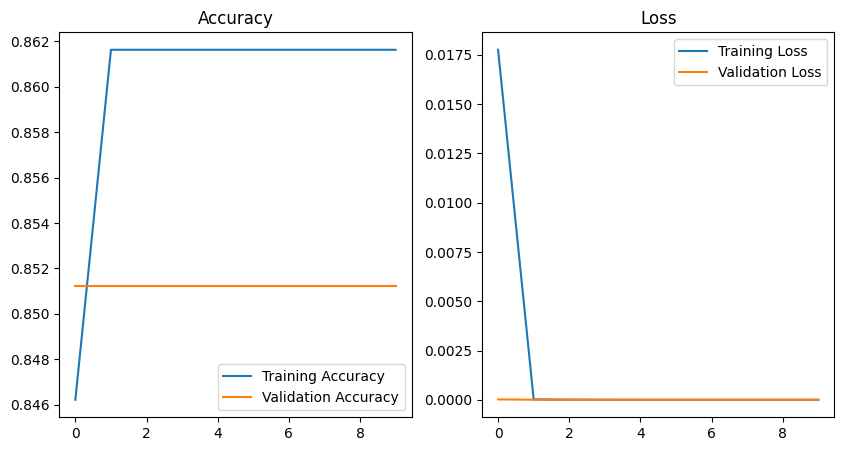

In [ ]:
import matplotlib.pyplot as plt

# Plot training accuracy and loss
plt.figure(figsize=(10, 5))

# Training accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

# Training loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()


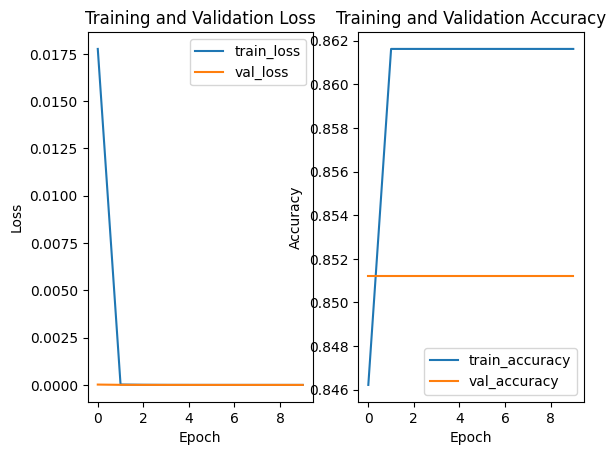

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
history.history

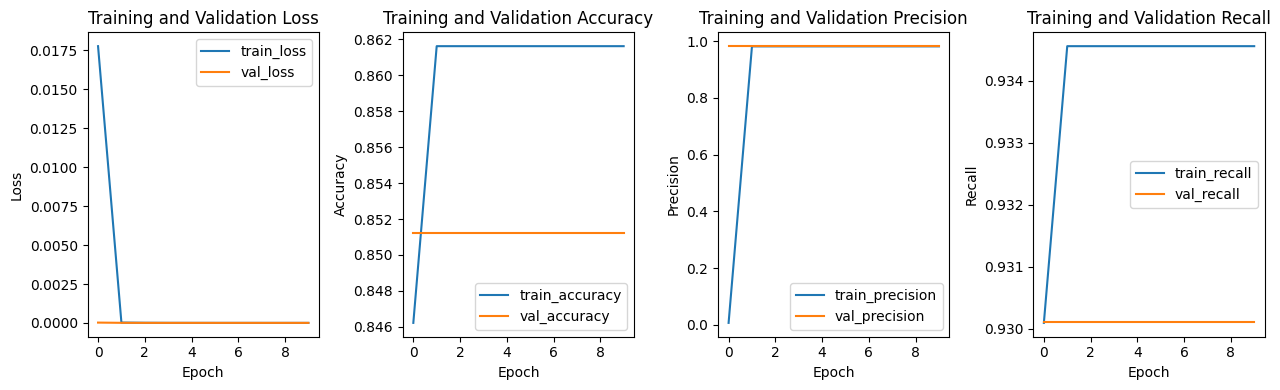

In [ ]:
# Plot training history (loss and accuracy)
plt.figure(figsize=(16, 4))

# Plot training and validation loss
plt.subplot(1, 5, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 5, 2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation precision
plt.subplot(1, 5, 3)
plt.plot(history.history['precision_8'], label='train_precision')
plt.plot(history.history['val_precision_8'], label='val_precision')
plt.title('Training and Validation Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()

# Plot training and validation recall
plt.subplot(1, 5, 4)
plt.plot(history.history['recall_8'], label='train_recall')
plt.plot(history.history['val_recall_8'], label='val_recall')
plt.title('Training and Validation Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()

# # Plot training and validation F1 score
# plt.subplot(1, 5, 5)
# plt.plot(history.history['f1_score_metric'], label='train_f1_score')
# plt.plot(history.history['val_f1_score_metric'], label='val_f1_score')
# plt.title('Training and Validation F1_score')
# plt.xlabel('Epoch')
# plt.ylabel('F1_score')
# plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
model.evaluate(test_dataset)

337/337 ━━━━━━━━━━━━━━━━━━━━ 26s 75ms/step - accuracy: 0.8606 - loss: 6.8784e-06 - mean_io_u_8: 0.5014 - precision_8: 0.9824 - recall_8: 0.9346


[7.081317107804352e-06,
 0.8512059450149536,
 0.5012355446815491,
 0.9827458262443542,
 0.9301141500473022]

In [ ]:

train_val_df_, test_df = train_test_split(valid_df, test_size=0.2, random_state=42)

train_df_, val_df_ = train_test_split(train_val_df_, test_size=0.25, random_state=42)

print(f"Training samples: {len(train_df)}, Validation samples: {len(val_df)}, Test samples: {len(test_df)}")


In [ ]:
# Load and preprocess  image
def load_and_preprocess_image(image_path, image_height, image_width):

    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [image_height, image_width])
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img / 255.0



    return img

In [ ]:
image_test='/content/drive/MyDrive/DeepLearning/Project/data/zucchini-patties-51245270.jpg'
import numpy as np

new_image_path = image_test

new_image = load_and_preprocess_image(new_image_path, IMG_SIZE, IMG_SIZE)

input_data = np.array([new_image])

predictions = model.predict(input_data)



1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


In [ ]:
predictions
len(predictions[0])

83374